# **1. Install Library**

In [1]:
# ! pip install mlxtend==0.21.0

In [2]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value=100
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)

# **2. Read Data**

## 2.1 unrar

In [5]:
# ! unrar x drive/MyDrive/Data_FastRNN.rar

## 2.2 read data main

In [6]:
import pandas as pd
data_main=pd.read_excel("data_fastrnn1.xlsx",header=[1],sheet_name='ختور')
data_main

,نماد,firm,date,تاریخ شمسی,داده ها از 90 تا 1400,اولين قيمت,بالاترين قيمت,كمترين قيمت,قيمت پاياني,ارزش معاملات,...,dps,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار
0,Iran.Radiator,2,2011/03/28,1390/01/08,2366,1070,1070,1070,1110,898800,...,1300,1903,11.639517,0.416442,8.531519,24287.8,21.897961,1.056489e+05,119.892558,10392
1,Iran.Radiator,2,2011/03/29,1390/01/09,2367,1070,1110,1066,1091,75141115,...,1300,1903,11.639517,0.416442,8.531519,24486.6,21.970427,1.006767e+05,120.623502,10394
2,Iran.Radiator,2,2011/04/04,1390/01/15,2368,1110,1120,1110,1092,7792230,...,1300,1903,11.639517,0.416442,8.531519,25023.3,22.401603,7.101662e+04,120.990077,10403
3,Iran.Radiator,2,2011/04/05,1390/01/16,2369,1135,1135,1135,1093,2460680,...,1300,1903,11.639517,0.416442,8.531519,25550.4,22.472863,6.610210e+04,121.357388,10409
4,Iran.Radiator,2,2011/04/06,1390/01/17,2370,1136,1136,1136,1117,71582768,...,1300,1903,11.639517,0.416442,8.531519,25885.1,22.543950,6.119583e+04,122.463734,10404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,Iran.Radiator,2,2022/03/12,1400/12/21,4399,9600,9600,8860,9060,38626215340,...,200,970,2.437113,0.193521,6.629434,1332933.3,30.262781,1.168319e+07,122.463734,42000
2034,Iran.Radiator,2,2022/03/13,1400/12/22,4400,9000,9140,8900,9020,17348304230,...,200,970,2.437113,0.193521,6.629434,1335376.4,30.096101,1.167731e+07,122.833988,42000
2035,Iran.Radiator,2,2022/03/14,1400/12/23,4401,9000,9300,8790,8960,28181226850,...,200,970,2.437113,0.193521,6.629434,1334776.9,29.929022,1.167140e+07,123.204977,42000
2036,Iran.Radiator,2,2022/03/15,1400/12/24,4402,8920,9400,8820,9270,54162798920,...,200,970,2.437113,0.193521,6.629434,1337223.2,29.761546,1.166546e+07,123.576701,42000


# **3. Preproceesing Data**

In [3]:
data_main.isna().sum()

نماد                      0
firm                      0
date                      0
تاریخ شمسی                0
داده ها از 90 تا 1400     0
اولين قيمت                0
بالاترين قيمت             0
كمترين قيمت               0
قيمت پاياني               0
ارزش معاملات              0
حجم معاملات               0
قيمت پيش گشايش            0
قيمت اولي                 0
آخرين قيمت                0
x9                        4
MA(12)                   11
MA(26)                   25
EMA(12)                   0
EMA(26)                   0
MACD                     25
RSI                      14
dps                       0
eps                       0
p_e                       0
roa                       0
size                      0
شاخص کل                   0
تورم                      1
طلا                       1
نفت                       1
دلار                      0
dtype: int64

In [7]:
data_main_pre=data_main.fillna(0)
data_main_pre['lbl']=data_main_pre['قيمت پاياني']
data_main_pre.drop(['date','نماد','firm','داده ها از 90 تا 1400','تاریخ شمسی','قيمت اولي'],axis=1,inplace=True)
data_main_pre.drop('قيمت پاياني',axis=1,inplace=True)
data_main_pre

,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,x9,MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
0,1070,1070,1070,898800,840,1,1070,0.0,0.000000,0.000000,...,1903,11.639517,0.416442,8.531519,24287.8,21.897961,1.056489e+05,119.892558,10392,1110
1,1070,1110,1066,75141115,69662,10,1110,0.0,0.000000,0.000000,...,1903,11.639517,0.416442,8.531519,24486.6,21.970427,1.006767e+05,120.623502,10394,1091
2,1110,1120,1110,7792230,6993,2,1120,0.0,0.000000,0.000000,...,1903,11.639517,0.416442,8.531519,25023.3,22.401603,7.101662e+04,120.990077,10403,1092
3,1135,1135,1135,2460680,2168,1,1135,0.0,0.000000,0.000000,...,1903,11.639517,0.416442,8.531519,25550.4,22.472863,6.610210e+04,121.357388,10409,1093
4,1136,1136,1136,71582768,63013,9,1136,1114.2,0.000000,0.000000,...,1903,11.639517,0.416442,8.531519,25885.1,22.543950,6.119583e+04,122.463734,10404,1117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,9600,9600,8860,38626215340,4262658,600,8980,9244.0,9241.666667,9209.230769,...,970,2.437113,0.193521,6.629434,1332933.3,30.262781,1.168319e+07,122.463734,42000,9060
2034,9000,9140,8900,17348304230,1922962,537,8950,9140.0,9213.333333,9160.769231,...,970,2.437113,0.193521,6.629434,1335376.4,30.096101,1.167731e+07,122.833988,42000,9020
2035,9000,9300,8790,28181226850,3144889,559,8990,9078.0,9170.000000,9121.538462,...,970,2.437113,0.193521,6.629434,1334776.9,29.929022,1.167140e+07,123.204977,42000,8960
2036,8920,9400,8820,54162798920,5840869,979,9400,9126.0,9204.166667,9116.923077,...,970,2.437113,0.193521,6.629434,1337223.2,29.761546,1.166546e+07,123.576701,42000,9270


In [8]:
data_final=data_main_pre

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
print("Original descriptives:")
display(data_final.describe().round(2))

print("\nMin-Max-scaled descriptives:")
scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler()  #
scaler.fit(data_final)
data_scaled = scaler.transform(data_final)
df_scaled = pd.DataFrame(data_scaled, index=data_final.index, columns=data_final.columns)
display(df_scaled.describe().round(2))
data_normal=df_scaled


Original descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,x9,MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2038.00,2038.00,2038.00,2.038000e+03,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,...,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00
mean,12160.57,12409.37,11908.05,4.063012e+10,1783463.74,576.81,12133.47,12123.16,12105.45,12070.22,...,770.89,5.42,0.15,6.32,387974.67,28.39,4371266.86,63.89,34233.60,12229.91
std,20542.66,20944.88,20018.92,1.111469e+11,3349045.21,1261.04,20453.65,20407.10,20312.11,20111.83,...,412.47,5.32,0.08,0.54,527460.77,18.59,4246615.21,27.55,8627.96,20610.02
min,960.00,960.00,960.00,2.038000e+03,2.00,1.00,960.00,0.00,0.00,0.00,...,30.00,2.31,0.01,5.80,24016.50,0.00,0.00,0.00,10392.00,984.00
25%,2800.00,2845.25,2758.00,4.582243e+08,118647.25,37.00,2799.00,2801.85,2812.33,2819.23,...,553.00,2.56,0.10,6.03,74408.70,11.97,1022276.34,49.20,29606.75,2788.25
50%,3699.50,3749.50,3600.00,1.766441e+09,465054.50,99.00,3672.50,3646.30,3623.17,3596.88,...,582.00,3.09,0.13,6.11,87768.70,24.14,1585405.73,54.21,34331.00,3672.00
75%,10328.00,10494.50,9909.00,1.481628e+10,1887975.50,401.75,10133.00,9960.85,9823.90,9858.31,...,970.00,4.80,0.19,6.63,353949.45,42.26,6829916.00,66.66,42000.00,10136.00
max,136820.00,136870.00,128000.00,1.395922e+12,44385161.00,13213.00,130390.00,126930.00,120258.33,108716.04,...,1903.00,32.08,0.42,8.53,2078546.80,65.10,12334149.58,181.46,44120.00,133660.00



Min-Max-scaled descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,x9,MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,...,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00,2038.00
mean,0.08,0.08,0.09,0.03,0.04,0.04,0.09,0.10,0.10,0.11,...,0.40,0.10,0.36,0.19,0.18,0.44,0.35,0.35,0.71,0.08
std,0.15,0.15,0.16,0.08,0.08,0.10,0.16,0.16,0.17,0.18,...,0.22,0.18,0.19,0.20,0.26,0.29,0.34,0.15,0.26,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.02,0.02,0.03,...,0.28,0.01,0.23,0.08,0.02,0.18,0.08,0.27,0.57,0.01
50%,0.02,0.02,0.02,0.00,0.01,0.01,0.02,0.03,0.03,0.03,...,0.29,0.03,0.31,0.11,0.03,0.37,0.13,0.30,0.71,0.02
75%,0.07,0.07,0.07,0.01,0.04,0.03,0.07,0.08,0.08,0.09,...,0.50,0.08,0.46,0.30,0.16,0.65,0.55,0.37,0.94,0.07
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [10]:
data_ready = data_normal.copy()
lbl_ready=data_normal.iloc[:,-1]

print("_"*50)
print("data_final shape: {0}".format(data_ready.shape))
print("lbl_final shape: {0}".format(lbl_ready.shape))
print("_"*50)

__________________________________________________
data_final shape: (2038, 25)
lbl_final shape: (2038,)
__________________________________________________


# **4. Visualization Data**

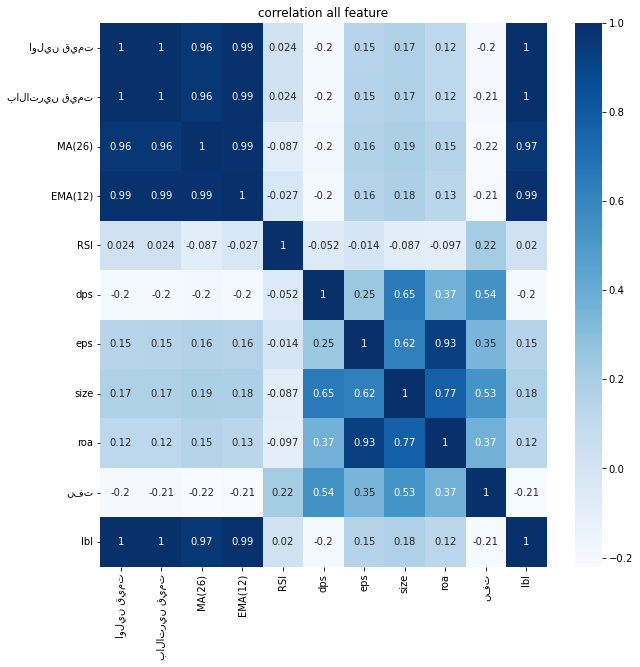

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cor = data_ready.iloc[:,[0,1,9,10,13,14,15,18,17,22,-1]].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.title("correlation all feature")
plt.show()

In [13]:
import numpy as np
col_names=data_ready.columns
cor_abs=np.abs(cor.iloc[:,-1])
idx_sort=np.argsort(cor_abs)
sort_cor=np.round(cor_abs[idx_sort],4)
col_names_new=np.array(col_names)
col_names_sort=col_names_new[idx_sort]
for i, item in  enumerate(col_names_sort):
  print('number: {0} , colums: {1} cor: {2}'.format(i,item,sort_cor[i]))


number: 0 , colums: حجم معاملات cor: 0.0202
number: 1 , colums: MA(12) cor: 0.1228
number: 2 , colums: آخرين قيمت cor: 0.1474
number: 3 , colums: x9 cor: 0.1758
number: 4 , colums: قيمت پيش گشايش cor: 0.1979
number: 5 , colums: MA(26) cor: 0.2071
number: 6 , colums: كمترين قيمت cor: 0.9659
number: 7 , colums: ارزش معاملات cor: 0.9906
number: 8 , colums: اولين قيمت cor: 0.9995
number: 9 , colums: بالاترين قيمت cor: 0.9995
number: 10 , colums: EMA(12) cor: 1.0


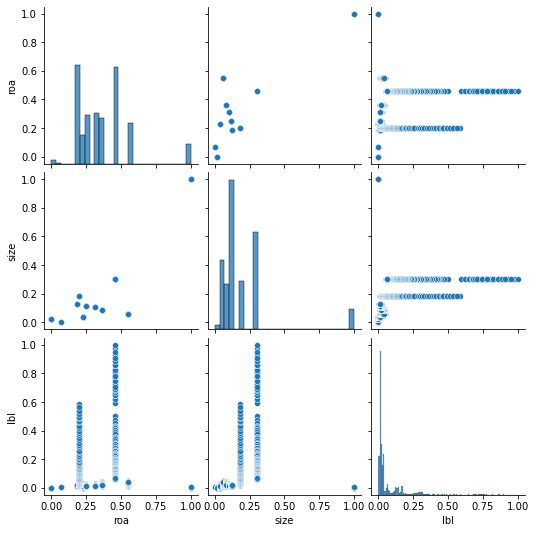

In [14]:
# importing packages
import seaborn
# pairplot with 
seaborn.pairplot(data_ready[['roa','size','lbl']])
# to show
plt.show()

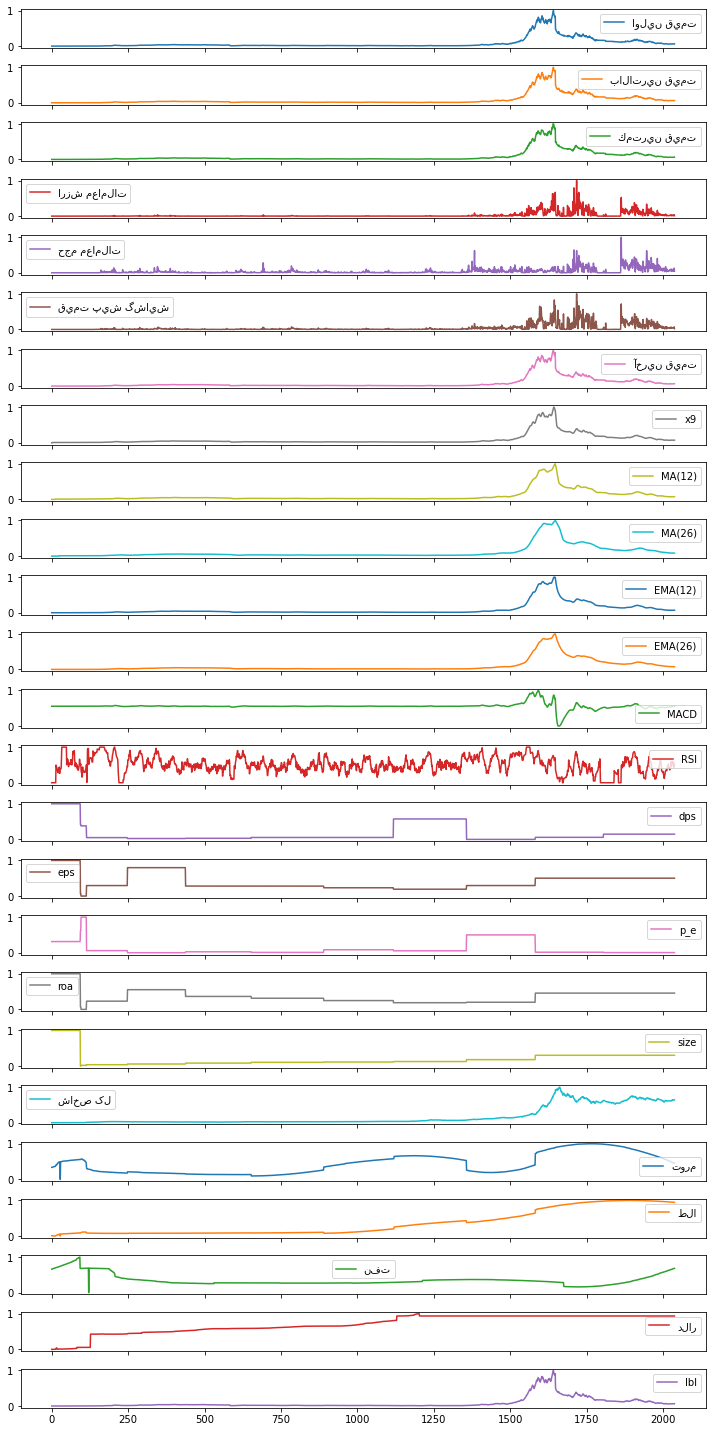

In [15]:
data_ready.plot(subplots=True,figsize=(10,20));
plt.tight_layout(); # <- this is often necessary when using subplots to avoid 

<Figure size 432x288 with 0 Axes>

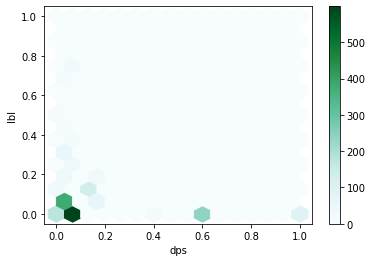

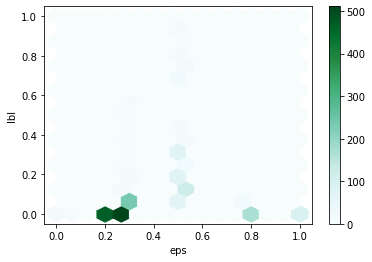

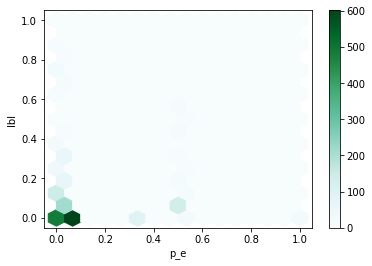

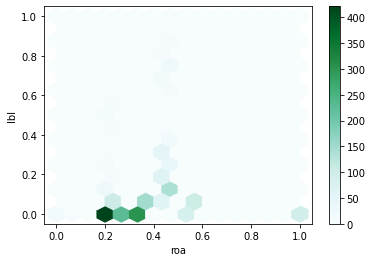

In [16]:
plt.figure()
data_ready.plot(kind="hexbin", x=data_ready.columns[14], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[15], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[16], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[17], y=data_ready.columns[-1], gridsize=15, sharex=False);
plt.show()

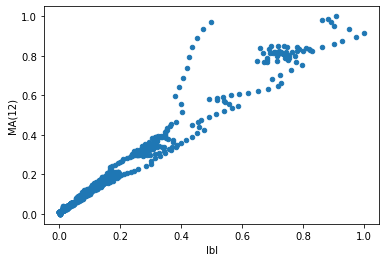

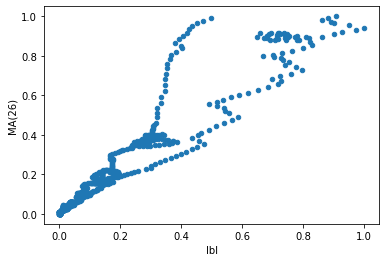

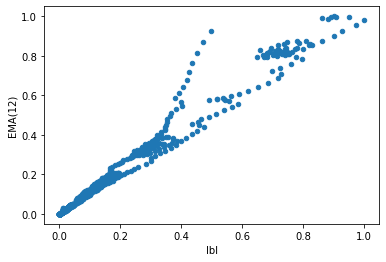

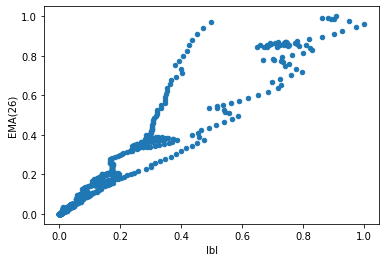

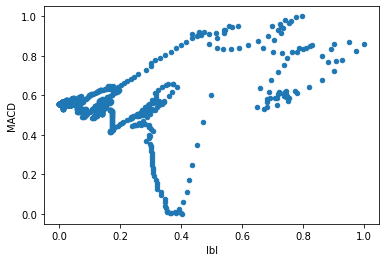

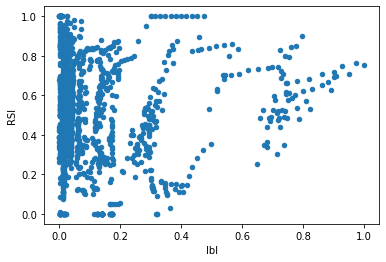

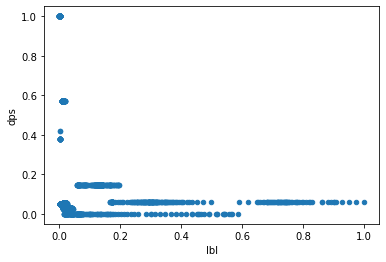

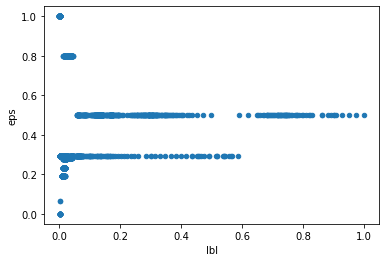

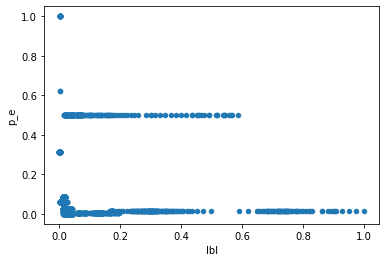

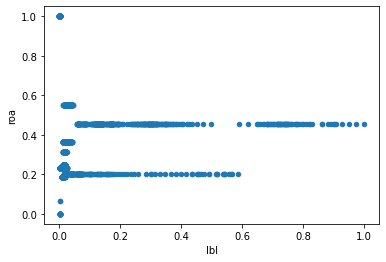

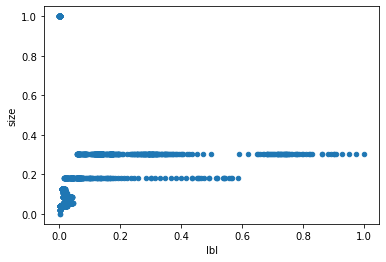

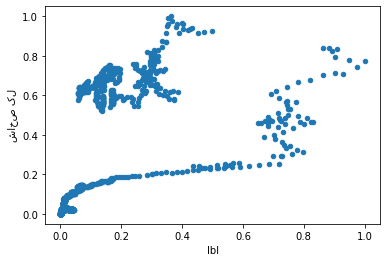

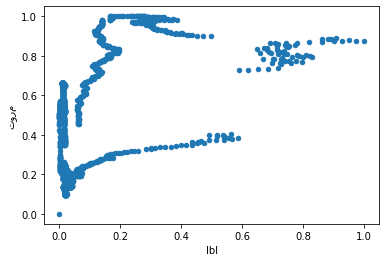

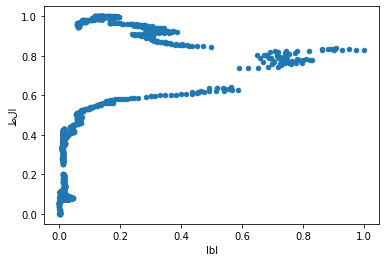

In [17]:
for i in range(8,22):
  data_ready.plot(data_ready.columns[-1], data_ready.columns[i], kind="scatter")

# **5. time window**

In [18]:
data_ready.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'آخرين قيمت', 'x9', 'MA(12)', 'MA(26)',
       'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps', 'p_e', 'roa', 'size',
       'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

In [19]:
n_batch=32
feature_input_FastRNN=data_ready.columns.tolist()
feature_out_FastRNN=['lbl']
n_sequence=7

In [20]:
import numpy as np

def multivariate_win(dataset, target, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []
    start_index=0
    end_index = None
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)




In [21]:
STEP =1
n_step=1
past_history = n_sequence
index_precentage = -1

data_can,lbl_candel=multivariate_win(data_ready[feature_input_FastRNN].values,
                                            data_ready[feature_out_FastRNN].values,
                                            past_history,
                                            n_step, STEP,
                                            single_step=True)
print("_"*50)
print('-> data_can  shape = {0}'.format(data_can.shape))
print('-> lbl shape = {0}'.format(lbl_candel.shape))
print("_"*50)


__________________________________________________
-> data_can  shape = (2030, 7, 25)
-> lbl shape = (2030, 1)
__________________________________________________


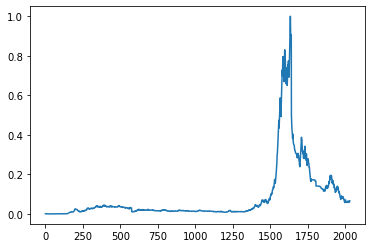

In [22]:
plt.plot(lbl_candel)
plt.show()

# **6. Train test split**

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_can , lbl_candel, test_size=0.10,shuffle=False, random_state=42)
print("", X_train.shape, "\n", y_train.shape, 
      "\n", X_test.shape, "\n", y_test.shape)

 (1827, 7, 25) 
 (1827, 1) 
 (203, 7, 25) 
 (203, 1)


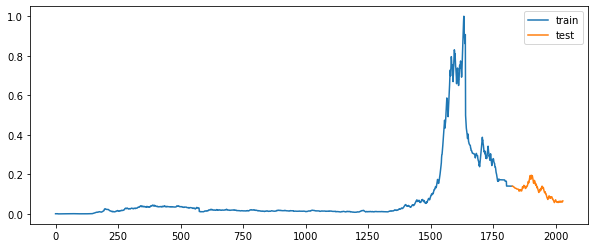

In [24]:
plt.figure(figsize=(10,4))
plt.plot(range(len(y_train)),y_train)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test)
plt.legend(['train','test'])
plt.show()

In [25]:
def fun_pre(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


def plot_pie(values,hlabels,uexplode=[0,0.1],my_color=["red","blue"]):
    plt.pie(values, 
            labels =hlabels,
            explode=uexplode,
            colors=my_color,
            autopct = lambda pct: fun_pre(pct, values))
    plt.legend()
    plt.show() 

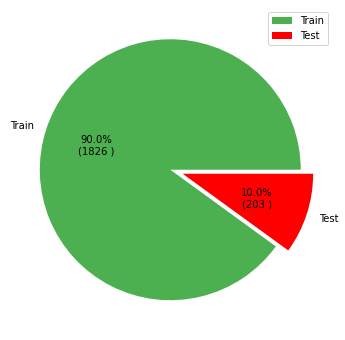

In [26]:
import matplotlib.pyplot as plt
import numpy as np
hlabels=["Train","Test"]
mycolors = [ "#4CAF50","red","blue","#0CFFF0"]

class1=X_train.shape[0]
class2=X_test.shape[0]


values=[class1,class2]
plt.figure(figsize=(6,6))
plt.title("",fontsize=14)
plot_pie(values,hlabels,[0,0.1],mycolors)
plt.show()

# **7.Horse herd optimization algorithm**

In [27]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


## 6.1 base code 

In [28]:
class Particle():
  def __init__(self):
          self.Position=[]
          self.Cost=[]
          self.Velocity=[]
          self.Best=[]

In [29]:
def HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt):

  w=1;
  phiD=0.02;
  phiI=0.02;


  g_Alpha=1.50;       #Grazing
  d_Alpha=0.5;        #Defense Mechanism
  h_Alpha=1.5;        #Hierarchy

  g_Beta=1.50;       # Grazing
  h_Beta=0.9;        #Hierarchy 
  s_Beta=0.20;       #Sociability
  d_Beta=0.20;       #Defense Mechanism

  g_Gamma=1.50;      #Grazing 
  h_Gamma=0.50;      #Hierarchy 
  s_Gamma=0.10;      #Sociability 
  i_Gamma=0.30;      #Imitation
  d_Gamma=0.10;      #Defense Mechanism 
  r_Gamma=0.05;      #Random (Wandering and Curiosity)

  g_Delta=1.50;      #Grazing
  r_Delta=0.10;      #Random (Wandering and Curiosity) 

  # Velocity limits
  VelMax = 0.3 * (VarMax - VarMin)
  VelMin = -VelMax



  Hourse = [Particle() for _ in range(nHourse)]
  GlobalBest=Particle()
  GlobalBest.Cost=np.inf;
  CostPositionCounter=np.zeros((nHourse,2+nVar));


  for i in range(nHourse):
      #Initialize Position
      Hourse[i].Position=np.random.uniform(VarMin, VarMax,VarSize)[0]
      #Initialize Velocity
      Hourse[i].Velocity=np.zeros(VarSize)

      #Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);
      #Update Personal Best
      Hourse[i].Best=deepcopy(Hourse[i])

      #Update Global Best
      if Hourse[i].Best.Cost<GlobalBest.Cost:
          GlobalBest=Hourse[i].Best;  
      ans=[i, Hourse[i].Best.Cost]
      ans.extend(Hourse[i].Best.Position.tolist())
      CostPositionCounter[i,:]=ans;

  BestCost = np.zeros((MaxIt, 1))

  #%%  Main Loop
  for it in range(MaxIt):
    CostPositionCounter=CostPositionCounter[CostPositionCounter[:, 1].argsort()]
    MeanPosition=np.mean(CostPositionCounter[0:nHourse,2:],axis=0);
    BadPosition=np.mean(CostPositionCounter[int((1-phiD)*nHourse):nHourse,2:],axis=0);
    GoodPosition=np.mean(CostPositionCounter[1:int(phiI*nHourse),2:],axis=0);
    for i in range(nHourse):
      CC=np.argwhere(CostPositionCounter[:,0]==i)[0][0]
      # Update Velocity
      if CC<=0.1*nHourse:
        Hourse[i].Velocity = h_Alpha*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        -d_Alpha*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Alpha*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
                
      elif CC<=0.3*nHourse:
        Hourse[i].Velocity = s_Beta*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
            -d_Beta*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
            +h_Beta*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
            +g_Beta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
          
      elif CC<=0.6*nHourse:
        Hourse[i].Velocity = s_Gamma*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
        +r_Gamma*rand(VarSize[1])*(Hourse[i].Position)\
        -d_Gamma*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
        +h_Gamma*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        +i_Gamma*rand(VarSize[1])*(GoodPosition-Hourse[i].Position)\
        +g_Gamma*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);
          
          
      else:
        Hourse[i].Velocity = +r_Delta*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Delta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);

      # Apply Velocity Limits
      Hourse[i].Velocity = np.maximum(Hourse[i].Velocity,VelMin);
      Hourse[i].Velocity = np.minimum(Hourse[i].Velocity,VelMax); 

      # Update Position
      Hourse[i].Position = Hourse[i].Position + Hourse[i].Velocity;
      
      # Velocity Mirror Effect
      IsOutside=(np.less(Hourse[i].Position, VarMin)\
                  | np.greater(Hourse[i].Position, VarMax))
      # IsOutside=IsOutside.reshape(1,-1)    
      Hourse[i].Velocity[IsOutside]=-Hourse[i].Velocity[IsOutside];
      
      # Apply Position Limits
      Hourse[i].Position = np.maximum(Hourse[i].Position,VarMin);
      Hourse[i].Position = np.minimum(Hourse[i].Position,VarMax);

      # Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);  

      # Update Personal Best
      if Hourse[i].Cost<Hourse[i].Best.Cost:
          Hourse[i].Best.Position=Hourse[i].Position;
          Hourse[i].Best.Cost=Hourse[i].Cost;
          # Update Global Best
          if Hourse[i].Best.Cost<GlobalBest.Cost:     
              GlobalBest=deepcopy(Hourse[i].Best);
    BestCost[it] = GlobalBest.Cost
    
    print(' , Iteration = '+ str(it)+\
              ', Best Cost = '+str(np.round(BestCost[it][0],4)))
    
    d_Alpha=d_Alpha*w; g_Alpha=g_Alpha*w;
    d_Beta=d_Beta*w; s_Beta=s_Beta*w; g_Beta=g_Beta*w;
    d_Gamma=d_Gamma*w; s_Gamma=s_Gamma*w
    r_Gamma=r_Gamma*w; i_Gamma=i_Gamma*w;
    g_Gamma=g_Gamma*w;
    r_Delta=r_Delta*w; g_Delta=g_Delta*w;
  return GlobalBest
    



## 6.2 Test 

In [30]:
from copy import copy, deepcopy
from numpy.random import rand
nHourse=10
nVar=10
VarMin = np.ones(nVar)*-100 # Lower bound of variables
VarMax = np.ones(nVar)*100 # Upper bound of variables
VarSize = (1, nVar) 
CostFunction=shpere;
MaxIt=10
best_sol=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


 , Iteration = 0, Best Cost = 4767.4248
 , Iteration = 1, Best Cost = 1851.3064
 , Iteration = 2, Best Cost = 930.7672
 , Iteration = 3, Best Cost = 402.9792
 , Iteration = 4, Best Cost = 177.1068
 , Iteration = 5, Best Cost = 28.8609
 , Iteration = 6, Best Cost = 14.153
 , Iteration = 7, Best Cost = 4.3358
 , Iteration = 8, Best Cost = 1.1717
 , Iteration = 9, Best Cost = 0.242


C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [31]:
best_sol.Position

array([ 0.08416858, -0.00759449, -0.42362282,  0.16290194, -0.00562847,
        0.00213076,  0.05264566,  0.06159685,  0.08302674,  0.12391556])

# **8.Spotted Hyena Optimizer**

In [32]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


In [33]:
def noh(best_hyena_fitness):
  min = 0.5;
  max = 1;
  count=0;
  M=(max-min)*rand() + min;
  M=M+best_hyena_fitness[0];

  for i in range(1,len(best_hyena_fitness)):
      if M>=best_hyena_fitness[i]:
        count=count+1;
  X=count;
  del count
  del M
  count=0;
  return X
  

## 7.1 base code 

In [34]:
import math
from numpy.random import rand

def SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations):

  # Initialize the hyena_pos of search agents
  hyena_pos = np.zeros((N, dimension))
  for i in range(N):
      #Initialize Position
      hyena_pos[i]=np.random.uniform(lowerbound, upperbound,dimension)

      
  Convergence_curve = np.zeros(Max_iterations)
  hyena_fitness=np.ones(N)*math.inf 


  #%%  Main Loop
  for Iteration in range(1,Max_iterations+1):
    for i in range(N):
      # Check boundries
      # FU=hyena_pos[i]>upperbound;
      # FL=hyena_pos[i]<lowerbound;
      # hyena_pos[i]=(hyena_pos[i]*(np.logical_not(FU+FL)))+FU*upperbound+FL*lowerbound
      # Apply  Limits
      hyena_pos[i] = np.maximum(hyena_pos[i],lowerbound);
      hyena_pos[i]= np.minimum(hyena_pos[i],upperbound); 

      hyena_fitness[i]=fitness(hyena_pos[i]);  


    if Iteration==1:
      idx_sort=np.argsort(hyena_fitness)
      fitness_sorted=hyena_fitness[idx_sort]
      sorted_population=hyena_pos[idx_sort].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()
    else:
      double_population=np.concatenate((pre_population,best_hyenas),axis=0);
      double_fitness=np.concatenate((pre_fitness,best_hyena_fitness),axis=0);
      idx_sort=np.argsort(double_fitness)
      double_fitness_sorted=double_fitness[idx_sort].copy()
      double_sorted_population=double_population[idx_sort].copy()
      fitness_sorted=double_fitness_sorted[0:N].copy()
      sorted_population=double_sorted_population[0:N].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()

    NOH=1+noh(best_hyena_fitness);
    Best_hyena_score=fitness_sorted[0].copy();
    Best_hyena_pos=sorted_population[0].copy();
    pre_population=hyena_pos.copy();
    pre_fitness=hyena_fitness.copy();
    
    a=5-Iteration*((5)/Max_iterations);
    HYE=0;
    CV=0;
    for i in range(N):
      for j in range(dimension):
        for k in range(NOH):
          HYE=0;
          r1=rand();
          r2=rand(); 
          Var1=2*a*r1-a; 
          Var2=2*r2; 
          distance_to_hyena=np.abs(Var2*sorted_population[k,j]-hyena_pos[i,j]);
          HYE=sorted_population[k,j]-Var1*distance_to_hyena;
          CV=CV+HYE;        
          distance_to_hyena=0;
        CV=np.array(CV)     
        hyena_pos[i,j]=(CV/(NOH+1));
        CV=0;
      
    Convergence_curve[Iteration-1]=Best_hyena_score;
    print(' , Iteration = '+ str(Iteration)+\
              ', Best Cost = '+str(np.round(Convergence_curve[Iteration-1],4)))
  return Best_hyena_pos,Best_hyena_score

## 7.2 Test 

In [35]:
from copy import copy, deepcopy
from numpy.random import rand
N=10
Max_iterations=10
dimension=10
lowerbound=np.ones(dimension)*-100 # Lower bound of variables
upperbound=np.ones(dimension)*100 # Lower bound of variables
fitness=shpere

best_Position,best_cost=SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations)


 , Iteration = 1, Best Cost = 26922.978
 , Iteration = 2, Best Cost = 26922.978
 , Iteration = 3, Best Cost = 22543.84
 , Iteration = 4, Best Cost = 21174.6117
 , Iteration = 5, Best Cost = 13032.5301
 , Iteration = 6, Best Cost = 4042.2325
 , Iteration = 7, Best Cost = 4042.2325
 , Iteration = 8, Best Cost = 1331.3144
 , Iteration = 9, Best Cost = 484.5735
 , Iteration = 10, Best Cost = 286.491


# **9.FastRNN**

## 9.1 Main code 

In [36]:
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import gen_math_ops
from tensorflow.keras import backend as K
from keras import backend
import tensorflow as tf


def gen_non_linearity(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return math_ops.tanh(A)
    elif non_linearity == "sigmoid":
        return math_ops.sigmoid(A)
    elif non_linearity == "relu":
        return gen_math_ops.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

def gen_non_linearity_keras(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return K.tanh(A)
    elif non_linearity == "sigmoid":
        return K.sigmoid(A)
    elif non_linearity == "relu":
        return K.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return K.maximum(K.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

In [37]:
from keras.layers import RNN
from keras import backend
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.initializers import RandomNormal, Constant, Ones


class FastRNNCell(keras.layers.Layer):

    def __init__(self, units, update_non_linearity="tanh",
                 wRank=None, uRank=None, alphaInit=-3.0, betaInit=3.0,
                 name="FastRNN", reuse=None,
                 **kwargs):
        self._hidden_size = units
        self.state_size = units
        self._update_non_linearity =update_non_linearity
        self._num_weight_matrices = [1, 1]
        self._wRank = wRank
        self._uRank = uRank
        self._alphaInit = alphaInit
        self._betaInit =betaInit
        if self._wRank is not None:
            self._num_weight_matrices[0] += 1
        if self._uRank is not None:
            self._num_weight_matrices[1] += 1
        self._name =name
        self.units = units
        self.state_size = units
        self.U=None
        super(FastRNNCell, self).__init__(**kwargs)
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        if self._wRank is None:
            W_matrix_init = RandomNormal(0,0.1)
            self.W = self.add_weight(
                shape=(input_dim, self._hidden_size),
                name='W',
                initializer=W_matrix_init)
        else:
            W_matrix_1_init = RandomNormal(0,0.1)
            self.W1 = self.add_weight(
                shape=(input_dim, self._wRank),
                name='W1',
                initializer=W_matrix_1_init)
            W_matrix_2_init = RandomNormal(0,0.1)
            self.W2 = self.add_weight(
                shape=(self._wRank, self._hidden_size),
                name='W2',
                initializer=W_matrix_2_init)

        if self._uRank is None:
            U_matrix_init = RandomNormal(0,0.1)
            self.U = self.add_weight(
                shape=(self._hidden_size, self._hidden_size),
                name='U',
                initializer=U_matrix_init)
        else:
            U_matrix_1_init = RandomNormal(0,0.1)
            self.U1 = self.add_weight(
                shape=(self._hidden_size, self._uRan),
                name='U1',
                initializer=U_matrix_1_init)
            U_matrix_2_init = RandomNormal(0,0.1)
            self.U2 = self.add_weight(
                shape=(self._uRank, self._hidden_size),
                name='U2',
                initializer=U_matrix_2_init)

        alpha_init = Constant(self._alphaInit)
        self.alpha = self.add_weight(
            shape=(1,1),
            name='alpha',
            initializer=alpha_init)

        beta_init = Constant(self._betaInit)
        self.beta = self.add_weight(
            shape=(1,1),
            name='beta',
            initializer=beta_init) 
        bias_update_init = Ones()
        self.bias_update = self.add_weight(
            shape=(1, self._hidden_size),
            name='B_h',
            initializer=bias_update_init)
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        if self._wRank is None:
            wComp = K.dot(inputs, self.W)
        else:
            wComp = K.dot(
                K.dot(inputs, self.W1), self.W2)

        if self._uRank is None:
            uComp = K.dot(states[0], self.U)
        else:
            uComp = K.dot(
                K.dot(states[0], self.U1), self.U2)

        pre_comp = wComp + uComp

        c = gen_non_linearity_keras(
            pre_comp + self.bias_update, self._update_non_linearity)

        new_h = K.sigmoid(self.beta) * \
            states[0] + K.sigmoid(self.alpha) * c
        return new_h, [new_h]



## 9.2  Default FastRNN

In [38]:
# from tensorflow.keras.layers import Dense, Input, RNN
from tensorflow import keras
def create_FastRNN_Base(data):
  fatrnn1=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_1")
  fatrnn2=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_2")
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  x=keras.layers.RNN(fatrnn1, return_sequences=True, name='fast_cell_1')(input_layer)
  x=keras.layers.RNN(fatrnn2, return_sequences=True, name='fast_cell_2')(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(50, activation='relu')(x)
  x = keras.layers.Dropout(0.1)(x)
  out= keras.layers.Dense(1)(x)
  model_base_FastRNN = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model_base_FastRNN.compile(optimizer=optimizerr,loss="mse")
  return model_base_FastRNN
model_base_FastRNN=create_FastRNN_Base(X_train)
model_base_FastRNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3682      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                             

## 9.3 Fianl FastRNN

In [39]:
def get_new_fast_layer(uint,active,alpha,beta,name):
  return FastRNNCell(units=uint, 
                      update_non_linearity=active, 
                      alphaInit=alpha, 
                      betaInit=beta,
                  name=name)

In [40]:
from tensorflow import keras
def ceate_fast_rnn(data,dict_fast):
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  fastRNN1=get_new_fast_layer(dict_fast['units1'],
                     dict_fast['active1'],
                     dict_fast['alpha1'],
                     dict_fast['beta1'],'fastRNN_1')
  fastRNN2=get_new_fast_layer(dict_fast['units2'],
                     dict_fast['active2'],
                     dict_fast['alpha2'],
                     dict_fast['beta2'],'fastRNN_2')
  fastRNN3=get_new_fast_layer(dict_fast['units3'],
                     dict_fast['active3'],
                     dict_fast['alpha3'],
                     dict_fast['beta3'],'fastRNN_3')
  
  
  x=keras.layers.RNN(fastRNN1, return_sequences=True,name='fastRNN_1')(input_layer)
  if(dict_fast['use_layer2'] ):
    x=keras.layers.RNN(fastRNN2, return_sequences=True,name='fastRNN_2')(x)
  if(dict_fast['use_layer3'] ):
    x=keras.layers.RNN(fastRNN3, return_sequences=True,name='fastRNN_3')(x)

  if(dict_fast['use_batchnorm'] ):
    x=keras.layers.BatchNormalization()(x)
  # x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(dict_fast['dense1'], activation='relu')(x)
  x = keras.layers.Dense(dict_fast['dense2'], activation='relu')(x)
  x = keras.layers.Dropout(dict_fast['drop'])(x)
  out= keras.layers.Dense(1)(x)
  model = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model.compile(optimizer=optimizerr,loss="mse")
  return model





In [41]:
dict_fast=dict()
dict_fast['use_layer2']  =True
dict_fast['use_layer3']  =True
dict_fast['use_batchnorm']   =True
dict_fast['units1']  =32
dict_fast['active1'] ='relu'
dict_fast['alpha1']  =-1.0
dict_fast['beta1']   =1.0
dict_fast['units2']  =32
dict_fast['active2'] ='relu'
dict_fast['alpha2']  =-3.0
dict_fast['beta2']   =3.0
dict_fast['units3']  =32
dict_fast['active3'] ='relu'
dict_fast['alpha3']  =-3.0
dict_fast['beta3']   =3.0
dict_fast['dense1']   =200
dict_fast['dense2']   =200
dict_fast['drop']   =0.1
model=ceate_fast_rnn(X_train,dict_fast)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 32)             3682      
                                                                 
 fastRNN_2 (RNN)             (None, 7, 32)             4130      
                                                                 
 fastRNN_3 (RNN)             (None, 7, 32)             4130      
                                                                 
 batch_normalization (BatchN  (None, 7, 32)            128       
 ormalization)                                                   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                          

# **10. Optimal FastRNN**

## 10.1 train and validation

In [43]:
from sklearn.model_selection import train_test_split

XX_train, XX_vali, yy_train, yy_vali = train_test_split(X_train , y_train, test_size=0.20,shuffle=False, random_state=42)
print("", XX_train.shape, "\n", yy_train.shape, 
      "\n", XX_vali.shape, "\n", yy_vali.shape)

 (1461, 7, 25) 
 (1461, 1) 
 (366, 7, 25) 
 (366, 1)


## 10.2 Define parameter optimal

In [44]:
array_active=['tanh', 'sigmoid', 'relu', 'quantTanh']
array_units_rnn=[ 2**item for item in range(2,11)]
array_drop=[ item/100 for item in range(0,100,3)]
array_units_dense=[ 2**item for item in range(0,12)]
array_use=[False,True]
array_units_dense

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [45]:
lb=np.zeros(18)
ub=np.zeros(18)
lb[0]=0;ub[0]=1;   # 0 : use_layer2: True, False : 0-1
lb[1]=0;ub[1]=1;   # 1 : use_layer3: True, False : 0-1
lb[2]=0;ub[2]=1;   # 2 : use_batchnorm: True, False : 0-1

lb[3]=0;ub[3]=8;   # 3 : units1: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[4]=0;ub[4]=3;   # 4 : active1: ['relu','sigmoid','elu','tanh'] : 0-4
lb[5]=-10;ub[5]=0; # 5 : alpha1: [-10....0] : (-10,0)
lb[6]=0;ub[6]=10;  # 6 : beta1: [0....10] : (0,10)

lb[7]=0;ub[7]=8;   # 7 : units2: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[8]=0;ub[8]=3;   # 8 : active2: ['relu','sigmoid','elu','tanh'] : 0-4
lb[9]=-10;ub[9]=0; # 9 : alpha2: [-10....0] : (-10,0)
lb[10]=0;ub[10]=10;# 10 : beta2: [0....10] : (0,10)

lb[11]=0;ub[11]=9;   # 11 : units3: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[12]=0;ub[12]=3;   # 12 : active3: ['relu','sigmoid','elu','tanh'] : 0-4
lb[13]=-10;ub[13]=0; # 13 : alpha3: [-10....0] : (-10,0)
lb[14]=0;ub[14]=10;  # 14 : beta3: [0....10] : (0,10)

lb[15]=0;ub[15]=11;  # 15 : dense1: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[16]=0;ub[16]=11;  # 16 : dense2: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[17]=0;ub[17]=33;  # 17 : drop: [0.0, 0.03, 0.06, 0.09,.....0.93, 0.96, 0.99] : 0-34


## 10.3 fitness

In [46]:
def int_round(x):
  return np.int32(np.round(x))

In [47]:
def fitness(x):

  try:
    dict_fast=dict()
    dict_fast['use_layer2']      =array_use[int_round(x[0])]
    dict_fast['use_layer3']      =array_use[int_round(x[1])]
    dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
    dict_fast['units1']          =array_units_rnn[int_round(x[3])]
    dict_fast['active1']         =array_active[int_round(x[4])]
    dict_fast['alpha1']    =np.round(x[5],4)
    dict_fast['beta1']     =np.round(x[6],4)
    dict_fast['units2']    =array_units_rnn[int_round(x[7])]
    dict_fast['active2']   =array_active[int_round(x[8])]
    dict_fast['alpha2']    =np.round(x[9],4)
    dict_fast['beta2']     =np.round(x[10],4)
    dict_fast['units3']    =array_units_rnn[int_round(x[11])]
    dict_fast['active3']   =array_active[int_round(x[12])]
    dict_fast['alpha3']    =np.round(x[13],4)
    dict_fast['beta3']     =np.round(x[14],4)
    dict_fast['dense1']    =array_units_dense[int_round(x[15])]
    dict_fast['dense2']    =array_units_dense[int_round(x[16])]
    dict_fast['drop']      =array_drop[int_round(x[17])]
  except:
    return np.inf

  model=ceate_fast_rnn(XX_train,dict_fast)
  # model.summary()
  hist_model=model.fit(x=XX_train, y=yy_train,
                       validation_data=(XX_vali,yy_vali),
                       epochs=epochs_opti,shuffle=True,
                       batch_size=batch_size_opti,verbose=0)
  print("_"*100)
  print(x)

  for key, value in dict_fast.items():
      # print(".."*20)
      print(key,':',value)
  a=np.mean(hist_model.history['val_loss'][-10:])
  b=np.mean(hist_model.history['loss'][-10:])
  c=np.max(hist_model.history['loss'][-10:])
  
  val_loss_mean=60*a+40*b+100*c
  print(".."*10)
  print(val_loss_mean)
  print("_"*100)
  return val_loss_mean


In [49]:
import numpy as np
x=np.random.uniform(lb,ub,(len(lb)))

In [50]:
# for test
epochs_opti=100
batch_size_opti=256
fitness(x)

____________________________________________________________________________________________________
[ 0.01892242  0.37558408  0.90999561  4.85836828  2.05294645 -8.59993974
  2.7644734   2.317825    1.04811839 -7.28668153  6.08504422  7.33913049
  1.68796474 -8.05731399  2.25156093  2.70392273  5.67267171 17.44952699]
use_layer2 : False
use_layer3 : False
use_batchnorm : True
units1 : 128
active1 : relu
alpha1 : -8.5999
beta1 : 2.7645
units2 : 16
active2 : sigmoid
alpha2 : -7.2867
beta2 : 6.085
units3 : 512
active3 : relu
alpha3 : -8.0573
beta3 : 2.2516
dense1 : 8
dense2 : 64
drop : 0.51
....................
9.124596580862999
____________________________________________________________________________________________________


9.124596580862999

## 10.4 hybrid FastRNN+HOA

In [40]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=128

# nHourse=7
# nVar=len(lb)
# VarMin =lb
# VarMax = ub
# VarSize = (1, nVar) 
# CostFunction=fitness;
# MaxIt=100
# best_sol_HOA=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


In [51]:
sol_opti_HOA=np.array([ 0.27728494,  0.02874808,  0.25567505,  0.6926708 ,  0.8110652 ,
        0.        ,  0.42749874,  0.        ,  0.52687585, -0.37489377,
        0.45783291,  0.57537696,  0.        , -2.67691579,  0.04416233,
        1.96404219,  3.21479994,  0.        ])

In [52]:
sol_opti_HOA

array([ 0.27728494,  0.02874808,  0.25567505,  0.6926708 ,  0.8110652 ,
        0.        ,  0.42749874,  0.        ,  0.52687585, -0.37489377,
        0.45783291,  0.57537696,  0.        , -2.67691579,  0.04416233,
        1.96404219,  3.21479994,  0.        ])

## 10.5 hybrid FastRNN+SHo

In [53]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=256

# N=8
# Max_iterations=30
# dimension=len(lb)
# lowerbound=lb
# upperbound=ub
# fitness=fitness

# best_sol_SHO,best_cost=SHO(N,nVar,lb,upperbound,dimension,fitness,Max_iterations)

In [54]:
best_sol_SHO=np.array([ 4.53362826e-02 , 2.95604668e-02 , 2.16637419e-03,  1.62351619e+00,
                       5.11771605e-01 ,-4.85779590e-01 , 2.26285477e-02 , 9.85806883e-02,
                       1.44541939e+00, -3.76037443e+00 , 7.05135611e-01 , 4.18576333e+00,
                       3.75479631e-02 ,-9.03548874e-01 , 7.97671606e-01 , 0.00000000e+00,
                       9.30709820e+00 , 1.19018205e-01])

In [55]:
# best_sol_SHO=np.array(best_sol_SHO)
best_sol_SHO

array([ 4.53362826e-02,  2.95604668e-02,  2.16637419e-03,  1.62351619e+00,
        5.11771605e-01, -4.85779590e-01,  2.26285477e-02,  9.85806883e-02,
        1.44541939e+00, -3.76037443e+00,  7.05135611e-01,  4.18576333e+00,
        3.75479631e-02, -9.03548874e-01,  7.97671606e-01,  0.00000000e+00,
        9.30709820e+00,  1.19018205e-01])

# **11. GAN**

In [67]:
feature_input_GAN=data_final.columns.tolist()
# feature_out_GAN=feature_input_GAN

In [72]:
n_batch=32
feature_input_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'x9',# MA(5)
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
feature_out_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'x9',# MA(5)
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
idx_col_GAN=feature_out_GAN.index('lbl')
n_sequence=7
n_features=len(feature_input_GAN)
idx_col_GAN

2

In [57]:
data_final.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'آخرين قيمت', 'x9', 'MA(12)', 'MA(26)',
       'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps', 'p_e', 'roa', 'size',
       'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

## 11.1 losss

In [58]:
def discriminator_loss(real_output, fake_output):
    real_loss = keras.losses.binary_crossentropy(tf.ones_like(real_output), real_output)
    fake_loss = keras.losses.binary_crossentropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(x, y, fake_output):
    a1=0.01
    g_loss = keras.losses.binary_crossentropy(tf.ones_like(fake_output), fake_output)
    g_mse = keras.losses.MSE(x, y)
    return a1*g_mse + (1-a1)*g_loss, g_mse

## 11.2 Generator

In [59]:
from tensorflow import keras

def make_generator_model():

  inputs = keras.layers.Input(shape=(n_sequence, n_features,))
  x = keras.layers.LSTM(units=10, return_sequences = True,
                            activation=None)(inputs)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  x =        keras.layers.LSTM(units=10, return_sequences = False,
                             activation=None)(x)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  
  x =  keras.layers.Dense(n_features, activation=None)(x)
  output =        keras.layers.LeakyReLU(alpha=0.3)(x) 
  model = keras.models.Model(inputs = inputs, outputs = output)
  #model.compile(loss=generator_loss)
  # model.compile(loss=None, metrics = [mse , mae, mape, rmse, ar])
  model.compile(loss=None, metrics = ['mse' , 'mae'])
  return model


In [60]:
generator = make_generator_model()

## 11.3 discriminator

In [61]:
def make_discriminator_model():
  model = keras.models.Sequential()
  input_shape=((n_sequence+1) * n_features,)
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(units=72, input_shape=input_shape, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.GaussianNoise(stddev=0.2))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=100, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=10, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(1 ,activation='sigmoid'))
  model.compile(loss=discriminator_loss)
  return model

In [62]:
discriminator=make_discriminator_model()

## 11.4 training function

In [63]:

def train_step_def(sequences, sequences_end):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_prediction = generator(sequences, training=True)

    sequences_true = tf.concat((sequences, sequences_end[:, None, :]), axis=1)
    sequences_fake = tf.concat((sequences, generated_prediction[:, None, :]), axis=1)

    real_output = discriminator(sequences_true, training=True)
    fake_output = discriminator(sequences_fake, training=True)

    gen_loss, gen_mse_loss = generator_loss(generated_prediction, 
                                            sequences_end, 
                                            fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

def test_step_def(sequences, sequences_end):
  generated_prediction = generator(sequences, training=False)

  sequences_true = tf.concat((sequences, sequences_end[:,None,:]), axis=1)
  sequences_fake = tf.concat((sequences, generated_prediction[:,None,:]), axis=1)

  real_output = discriminator(sequences_true, training=False)
  fake_output = discriminator(sequences_fake, training=False)

  gen_loss, gen_mse_loss = generator_loss(generated_prediction, sequences_end, fake_output)
  disc_loss = discriminator_loss(real_output, fake_output)
  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

In [64]:
def train(dataset, dataset_val, epochs):
  history = np.empty(shape = (5, epochs))
  history_val = np.empty(shape = (5, epochs))
  len_dataset = len(dataset)
  len_dataset_val = len(dataset_val)
  for epoch in range(epochs):

    cur_dis_loss = 0
    cur_gen_loss = 0
    cur_gen_mse_loss = 0
    for sequence_batch, sequence_end_batch in dataset:
      aux_cur_losses = train_step(tf.cast(sequence_batch, tf.float32), 
                                  tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss += aux_cur_losses[0]/len_dataset
      cur_dis_loss += aux_cur_losses[1]/len_dataset
      cur_gen_mse_loss += aux_cur_losses[2]/len_dataset

    #cur_gen_loss = generator.evaluate(dataset,verbose=False)
    cur_gen_metrics = generator.evaluate(dataset,verbose=False)[1:]
    #cur_dis_loss = discriminator.evaluate(dataset,verbose=False)

    history[:, epoch] = cur_gen_loss, cur_dis_loss, cur_gen_mse_loss, *cur_gen_metrics
    #history[:, epoch] = cur_gen_loss, *cur_gen_slice_metrics

    #cur_gen_loss_val = generator.evaluate(dataset_val,verbose=False)
    cur_gen_metrics_val = generator.evaluate(dataset_val,verbose=False)[1: ]

    #cur_dis_loss_val = discriminator.evaluate(dataset_val,verbose=False)

    cur_gen_loss_val = 0
    cur_dis_loss_val = 0
    cur_gen_mse_loss_val = 0
    for sequence_batch, sequence_end_batch in dataset_val:
      aux_cur_losses_val = test_step(tf.cast(sequence_batch, tf.float32), 
                                     tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss_val += aux_cur_losses_val[0]/len_dataset_val
      cur_dis_loss_val += aux_cur_losses_val[1]/len_dataset_val
      cur_gen_mse_loss_val += aux_cur_losses_val[2]/len_dataset_val
    


    history_val[:, epoch] = cur_gen_loss_val, cur_dis_loss_val, cur_gen_mse_loss_val, *cur_gen_metrics_val

    print ('Time for epoch {}  Generator Loss: {},  Discriminator_loss: {}'
           .format(epoch + 1, cur_gen_loss, cur_dis_loss))
      
  return history, history_val

## 11.5 plot loss function

In [65]:
metrics_names = ["gen_loss","dis_loss","gen_mse_loss", 'mse','mae']

def plot_history(history, history_val):
  for i, metric_name in enumerate(metrics_names):  
    plt.figure()
    plt.title(metric_name)
    plt.plot(history[i], label='train')
    plt.plot(history_val[i], label='test')
    plt.legend()
  plt.show()

In [66]:
def plot_frame(sequence, target, model):
  sequence, target = data_gen_test[0]
  y_pred = model.predict(sequence)[...,idx_col_GAN]
  y_true = target[...,idx_col_GAN]

  plt.figure()
  plt.title("closing price")
  plt.plot(y_true, label="true")
  plt.plot(y_pred, label="prediction")
  plt.legend()
  plt.show()

#plot_frame(*data_gen_test[0], generator)

In [67]:
def get_best_results(history):
  # get best mse
  min_index = np.argmin(history[3, :])

  return history[:, min_index]

#get_best_results(history_val)

## 11.6 train test Timeseries keras

In [68]:
def mean_squared_error(dataset):
  mse=0
  for X_batch, y_batch in dataset:
    mse += np.mean(np.square(X_batch[:, -1, idx_col_GAN:idx_col_GAN+1]-y_batch[:, idx_col_GAN:idx_col_GAN+1]))
  mse /= len(dataset)
  return mse


In [69]:
class Standarized_TimeseriesGenerator(tf.keras.preprocessing.sequence.TimeseriesGenerator):
  def __getitem__(self, index):
    samples, targets  = super(Standarized_TimeseriesGenerator, self).__getitem__(index)
    return samples, targets

In [73]:
def get_gen_train_test(dataframe):
  data = dataframe[feature_input_GAN].to_numpy()
  targets = dataframe[feature_out_GAN].to_numpy()
  n_samples = data.shape[0]
  train_test_split=int(n_samples*0.9)

  data_gen_train = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = 0,
                                end_index = train_test_split,
                                shuffle = True)
  data_gen_test = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = train_test_split,
                                end_index = n_samples-1)

  return data_gen_train, data_gen_test

data_gen_train, data_gen_test = get_gen_train_test(data_final)

# **12. Run all methods**

In [74]:
myTable=[]

## 12.1 FastRNN-Base

In [75]:
model_FastRNN_Base=create_FastRNN_Base(X_train)
model_FastRNN_Base.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3682      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_13 (Dense)            (None, 50)                1650      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                           

In [86]:
hist_model_FastRNN_Base=model_FastRNN_Base.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
58/58 [==============================] - 4s 14ms/step - loss: 0.0304 - val_loss: 0.0020
Epoch 2/100
58/58 [==============================] - 1s 9ms/step - loss: 0.0175 - val_loss: 0.0027
Epoch 3/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0031
Epoch 4/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 5/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 2.8672e-04
Epoch 6/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 2.8333e-04
Epoch 7/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 3.0530e-04
Epoch 8/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 3.4369e-04
Epoch 9/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 8.7662e-04
Epoch 10/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0012 - val_l

In [133]:
from sklearn import metrics
import math
y_pred=model_FastRNN_Base.predict(X_test,verbose=0)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_Base',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)

[['FastRNN_Base', 0.0005, 0.0227, 0.0185, 0.6284, 0.1646]]


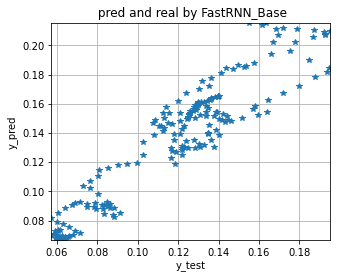

In [88]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_test)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by FastRNN_Base')
plt.show()

## 12.2 FastRNN-HOA

In [76]:
x=sol_opti_HOA.copy()

In [77]:
dict_fast=dict()
dict_fast['use_layer2']      =array_use[int_round(x[0])]
dict_fast['use_layer3']      =array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         =array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   =array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =array_units_dense[int_round(x[15])]
dict_fast['dense2']    =array_units_dense[int_round(x[16])]
dict_fast['drop']      =array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


____________________________________________________________________________________________________
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 8
active1 : sigmoid
alpha1 : 0.0
beta1 : 0.4275
units2 : 4
active2 : sigmoid
alpha2 : -0.3749
beta2 : 0.4578
units3 : 8
active3 : tanh
alpha3 : -2.6769
beta3 : 0.0442
dense1 : 4
dense2 : 8
drop : 0.0
____________________________________________________________________________________________________


In [78]:
FastRNN_HOA=ceate_fast_rnn(X_train,dict_fast)
FastRNN_HOA.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 8)              538       
                                                                 
 global_max_pooling1d_4 (Glo  (None, 8)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_15 (Dense)            (None, 4)                 36        
                                                                 
 dense_16 (Dense)            (None, 8)                 40        
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                           

In [106]:
# fitness(x)

In [107]:
hist_model_FastRNN_HOA=FastRNN_HOA.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
58/58 [==============================] - 2s 8ms/step - loss: 0.0250 - val_loss: 0.0011
Epoch 2/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0161 - val_loss: 6.8379e-04
Epoch 3/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0071 - val_loss: 0.0046
Epoch 4/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0070
Epoch 5/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0055
Epoch 6/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 7/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 8/100
58/58 [==============================] - 0s 5ms/step - loss: 8.6950e-04 - val_loss: 7.0292e-04
Epoch 9/100
58/58 [==============================] - 0s 5ms/step - loss: 8.0427e-04 - val_loss: 4.4660e-04
Epoch 10/100
58/58 [==============================] - 0s 5ms/step - loss: 7.7597e-04 - va

Epoch 73/100
58/58 [==============================] - 0s 5ms/step - loss: 4.6475e-04 - val_loss: 1.3094e-04
Epoch 74/100
58/58 [==============================] - 0s 5ms/step - loss: 4.3374e-04 - val_loss: 1.7543e-04
Epoch 75/100
58/58 [==============================] - 0s 5ms/step - loss: 4.3750e-04 - val_loss: 1.0452e-04
Epoch 76/100
58/58 [==============================] - 0s 5ms/step - loss: 4.4159e-04 - val_loss: 1.8183e-04
Epoch 77/100
58/58 [==============================] - 0s 5ms/step - loss: 4.3714e-04 - val_loss: 1.4086e-04
Epoch 78/100
58/58 [==============================] - 0s 5ms/step - loss: 4.4968e-04 - val_loss: 1.0113e-04
Epoch 79/100
58/58 [==============================] - 0s 5ms/step - loss: 4.2254e-04 - val_loss: 1.6700e-04
Epoch 80/100
58/58 [==============================] - 0s 5ms/step - loss: 4.5567e-04 - val_loss: 9.5098e-05
Epoch 81/100
58/58 [==============================] - 0s 5ms/step - loss: 4.3385e-04 - val_loss: 1.0017e-04
Epoch 82/100
58/58 [========

In [134]:
from sklearn import metrics
y_pred=FastRNN_HOA.predict(X_test,verbose=0)

mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_HOA',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)



[['FastRNN_Base', 0.0005, 0.0227, 0.0185, 0.6284, 0.1646], ['FastRNN_HOA', 0.0001, 0.0097, 0.0077, 0.9319, 0.0714]]


In [108]:
myTable=myTable[0]

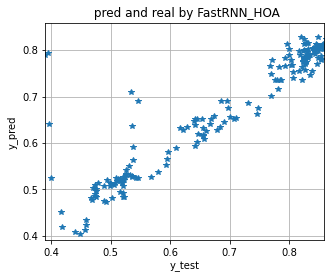

In [87]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_pred)])
plt.ylim([min(y_test),max(y_pred)])
plt.title(' pred and real by FastRNN_HOA')
plt.show()

## 12.3 FastRNN-SHO

In [79]:
x=best_sol_SHO.copy()

In [80]:
dict_fast=dict()
dict_fast['use_layer2']      =array_use[int_round(x[0])]
dict_fast['use_layer3']      =array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         =array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   =array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =array_units_dense[int_round(x[15])]
dict_fast['dense2']    =array_units_dense[int_round(x[16])]
dict_fast['drop']      =array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


____________________________________________________________________________________________________
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 16
active1 : sigmoid
alpha1 : -0.4858
beta1 : 0.0226
units2 : 4
active2 : sigmoid
alpha2 : -3.7604
beta2 : 0.7051
units3 : 64
active3 : tanh
alpha3 : -0.9035
beta3 : 0.7977
dense1 : 1
dense2 : 512
drop : 0.0
____________________________________________________________________________________________________


In [81]:
FastRNN_SHO=ceate_fast_rnn(X_train,dict_fast)
FastRNN_SHO.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 16)             1330      
                                                                 
 global_max_pooling1d_5 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
 dense_19 (Dense)            (None, 512)               1024      
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                           

In [117]:
hist_model_FastRNN_SHO=FastRNN_SHO.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
58/58 [==============================] - 2s 8ms/step - loss: 0.0274 - val_loss: 0.0017
Epoch 2/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0207 - val_loss: 0.0016
Epoch 3/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 4/100
58/58 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 5/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 6/100
58/58 [==============================] - 0s 5ms/step - loss: 8.4566e-04 - val_loss: 1.6994e-04
Epoch 7/100
58/58 [==============================] - 0s 5ms/step - loss: 8.6050e-04 - val_loss: 1.0019e-04
Epoch 8/100
58/58 [==============================] - 0s 5ms/step - loss: 6.8095e-04 - val_loss: 0.0010
Epoch 9/100
58/58 [==============================] - 0s 5ms/step - loss: 6.7277e-04 - val_loss: 1.1539e-04
Epoch 10/100
58/58 [==============================] - 0s 5ms/step - loss: 6.4071e

Epoch 73/100
58/58 [==============================] - 0s 5ms/step - loss: 3.9599e-04 - val_loss: 6.6259e-04
Epoch 74/100
58/58 [==============================] - 0s 5ms/step - loss: 4.2673e-04 - val_loss: 8.3989e-05
Epoch 75/100
58/58 [==============================] - 0s 5ms/step - loss: 3.6096e-04 - val_loss: 8.5849e-05
Epoch 76/100
58/58 [==============================] - 0s 5ms/step - loss: 3.4860e-04 - val_loss: 3.9467e-04
Epoch 77/100
58/58 [==============================] - 0s 5ms/step - loss: 3.9533e-04 - val_loss: 9.5030e-05
Epoch 78/100
58/58 [==============================] - 0s 5ms/step - loss: 3.3840e-04 - val_loss: 9.0244e-05
Epoch 79/100
58/58 [==============================] - 0s 5ms/step - loss: 3.3571e-04 - val_loss: 8.8676e-05
Epoch 80/100
58/58 [==============================] - 0s 5ms/step - loss: 3.7225e-04 - val_loss: 0.0029
Epoch 81/100
58/58 [==============================] - 0s 5ms/step - loss: 4.8238e-04 - val_loss: 8.2389e-05
Epoch 82/100
58/58 [============

In [135]:
from sklearn import metrics
y_pred=FastRNN_SHO.predict(X_test,verbose=0)

mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_SHO',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)


[['FastRNN_Base', 0.0005, 0.0227, 0.0185, 0.6284, 0.1646], ['FastRNN_HOA', 0.0001, 0.0097, 0.0077, 0.9319, 0.0714], ['FastRNN_SHO', 0.0001, 0.0098, 0.008, 0.9303, 0.071]]


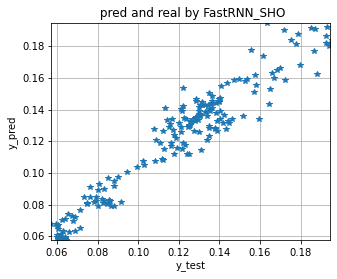

In [119]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_pred)])
plt.ylim([min(y_test),max(y_pred)])
plt.title(' pred and real by FastRNN_SHO')
plt.show()

## 12.4 GAN_Base

In [120]:
EPOCHS = 1000

In [121]:
data_gen_train, data_gen_test = get_gen_train_test(data_normal)

generator = make_generator_model()
discriminator=make_discriminator_model()

learning_rate=1e-4
generator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)

@tf.function
def train_step(sequences, sequences_end):
  return train_step_def(sequences, sequences_end)

@tf.function
def test_step(sequences, sequences_end):
  return test_step_def(sequences, sequences_end)



Time for epoch 1  Generator Loss: 0.6934932470321655,  Discriminator_loss: 1.383529543876648
Time for epoch 2  Generator Loss: 0.6928859949111938,  Discriminator_loss: 1.3828191757202148
Time for epoch 3  Generator Loss: 0.6921780705451965,  Discriminator_loss: 1.38145911693573
Time for epoch 4  Generator Loss: 0.6928954720497131,  Discriminator_loss: 1.3801130056381226
Time for epoch 5  Generator Loss: 0.6931447982788086,  Discriminator_loss: 1.3788223266601562
Time for epoch 6  Generator Loss: 0.691254198551178,  Discriminator_loss: 1.3821316957473755
Time for epoch 7  Generator Loss: 0.6922309994697571,  Discriminator_loss: 1.3802863359451294
Time for epoch 8  Generator Loss: 0.6907497048377991,  Discriminator_loss: 1.380578637123108
Time for epoch 9  Generator Loss: 0.6893161535263062,  Discriminator_loss: 1.3837931156158447
Time for epoch 10  Generator Loss: 0.6887557506561279,  Discriminator_loss: 1.384305715560913
Time for epoch 11  Generator Loss: 0.6884540915489197,  Discrimin

Time for epoch 88  Generator Loss: 0.7007440328598022,  Discriminator_loss: 1.3749715089797974
Time for epoch 89  Generator Loss: 0.6947340965270996,  Discriminator_loss: 1.3795243501663208
Time for epoch 90  Generator Loss: 0.6992352604866028,  Discriminator_loss: 1.3734034299850464
Time for epoch 91  Generator Loss: 0.6995280981063843,  Discriminator_loss: 1.3760251998901367
Time for epoch 92  Generator Loss: 0.7024132013320923,  Discriminator_loss: 1.3713772296905518
Time for epoch 93  Generator Loss: 0.7029805183410645,  Discriminator_loss: 1.3753620386123657
Time for epoch 94  Generator Loss: 0.6999492049217224,  Discriminator_loss: 1.3777220249176025
Time for epoch 95  Generator Loss: 0.6988328099250793,  Discriminator_loss: 1.377428650856018
Time for epoch 96  Generator Loss: 0.6981526613235474,  Discriminator_loss: 1.3769603967666626
Time for epoch 97  Generator Loss: 0.7067126631736755,  Discriminator_loss: 1.3729013204574585
Time for epoch 98  Generator Loss: 0.69716304540634

Time for epoch 174  Generator Loss: 0.7086463570594788,  Discriminator_loss: 1.37008798122406
Time for epoch 175  Generator Loss: 0.718063235282898,  Discriminator_loss: 1.367919683456421
Time for epoch 176  Generator Loss: 0.7061929106712341,  Discriminator_loss: 1.3742481470108032
Time for epoch 177  Generator Loss: 0.7117236256599426,  Discriminator_loss: 1.368752360343933
Time for epoch 178  Generator Loss: 0.7020845413208008,  Discriminator_loss: 1.3755100965499878
Time for epoch 179  Generator Loss: 0.7155873775482178,  Discriminator_loss: 1.3670910596847534
Time for epoch 180  Generator Loss: 0.7067356705665588,  Discriminator_loss: 1.3755488395690918
Time for epoch 181  Generator Loss: 0.7126919627189636,  Discriminator_loss: 1.3713613748550415
Time for epoch 182  Generator Loss: 0.7084283232688904,  Discriminator_loss: 1.3701486587524414
Time for epoch 183  Generator Loss: 0.7143202424049377,  Discriminator_loss: 1.3687782287597656
Time for epoch 184  Generator Loss: 0.7059465

Time for epoch 260  Generator Loss: 0.7230642437934875,  Discriminator_loss: 1.3664692640304565
Time for epoch 261  Generator Loss: 0.7203729748725891,  Discriminator_loss: 1.3704547882080078
Time for epoch 262  Generator Loss: 0.7093905806541443,  Discriminator_loss: 1.3720141649246216
Time for epoch 263  Generator Loss: 0.7210068106651306,  Discriminator_loss: 1.3686131238937378
Time for epoch 264  Generator Loss: 0.7264400720596313,  Discriminator_loss: 1.3653291463851929
Time for epoch 265  Generator Loss: 0.7135008573532104,  Discriminator_loss: 1.3733915090560913
Time for epoch 266  Generator Loss: 0.7159520983695984,  Discriminator_loss: 1.374377727508545
Time for epoch 267  Generator Loss: 0.7199105620384216,  Discriminator_loss: 1.3710768222808838
Time for epoch 268  Generator Loss: 0.72933030128479,  Discriminator_loss: 1.3679041862487793
Time for epoch 269  Generator Loss: 0.7184379696846008,  Discriminator_loss: 1.3692983388900757
Time for epoch 270  Generator Loss: 0.72033

Time for epoch 346  Generator Loss: 0.726595401763916,  Discriminator_loss: 1.3608659505844116
Time for epoch 347  Generator Loss: 0.7284566164016724,  Discriminator_loss: 1.369041919708252
Time for epoch 348  Generator Loss: 0.7283797860145569,  Discriminator_loss: 1.359587550163269
Time for epoch 349  Generator Loss: 0.726286768913269,  Discriminator_loss: 1.3604958057403564
Time for epoch 350  Generator Loss: 0.735437273979187,  Discriminator_loss: 1.3638277053833008
Time for epoch 351  Generator Loss: 0.7300873398780823,  Discriminator_loss: 1.3616318702697754
Time for epoch 352  Generator Loss: 0.7206558585166931,  Discriminator_loss: 1.3689525127410889
Time for epoch 353  Generator Loss: 0.7124115228652954,  Discriminator_loss: 1.3703676462173462
Time for epoch 354  Generator Loss: 0.7109410166740417,  Discriminator_loss: 1.37356436252594
Time for epoch 355  Generator Loss: 0.7236277461051941,  Discriminator_loss: 1.3665136098861694
Time for epoch 356  Generator Loss: 0.723387598

Time for epoch 432  Generator Loss: 0.728027880191803,  Discriminator_loss: 1.3654531240463257
Time for epoch 433  Generator Loss: 0.7191381454467773,  Discriminator_loss: 1.3684207201004028
Time for epoch 434  Generator Loss: 0.7208164930343628,  Discriminator_loss: 1.368868350982666
Time for epoch 435  Generator Loss: 0.712548553943634,  Discriminator_loss: 1.369779109954834
Time for epoch 436  Generator Loss: 0.724174439907074,  Discriminator_loss: 1.3624706268310547
Time for epoch 437  Generator Loss: 0.7190564870834351,  Discriminator_loss: 1.3718452453613281
Time for epoch 438  Generator Loss: 0.7166392207145691,  Discriminator_loss: 1.371323823928833
Time for epoch 439  Generator Loss: 0.726899266242981,  Discriminator_loss: 1.3666510581970215
Time for epoch 440  Generator Loss: 0.7191038727760315,  Discriminator_loss: 1.3704735040664673
Time for epoch 441  Generator Loss: 0.7188305854797363,  Discriminator_loss: 1.3635472059249878
Time for epoch 442  Generator Loss: 0.729593098

Time for epoch 518  Generator Loss: 0.7353832125663757,  Discriminator_loss: 1.3603787422180176
Time for epoch 519  Generator Loss: 0.7281699776649475,  Discriminator_loss: 1.3673255443572998
Time for epoch 520  Generator Loss: 0.7273572683334351,  Discriminator_loss: 1.3630421161651611
Time for epoch 521  Generator Loss: 0.7277812957763672,  Discriminator_loss: 1.372350811958313
Time for epoch 522  Generator Loss: 0.7299521565437317,  Discriminator_loss: 1.3622829914093018
Time for epoch 523  Generator Loss: 0.7321513891220093,  Discriminator_loss: 1.3614617586135864
Time for epoch 524  Generator Loss: 0.729234516620636,  Discriminator_loss: 1.3680742979049683
Time for epoch 525  Generator Loss: 0.7337806820869446,  Discriminator_loss: 1.3633108139038086
Time for epoch 526  Generator Loss: 0.7236612439155579,  Discriminator_loss: 1.3661952018737793
Time for epoch 527  Generator Loss: 0.7330460548400879,  Discriminator_loss: 1.3656052350997925
Time for epoch 528  Generator Loss: 0.7341

Time for epoch 604  Generator Loss: 0.7326743006706238,  Discriminator_loss: 1.3679195642471313
Time for epoch 605  Generator Loss: 0.7283423542976379,  Discriminator_loss: 1.36165452003479
Time for epoch 606  Generator Loss: 0.7362762093544006,  Discriminator_loss: 1.3607714176177979
Time for epoch 607  Generator Loss: 0.7352439761161804,  Discriminator_loss: 1.3622757196426392
Time for epoch 608  Generator Loss: 0.7402030825614929,  Discriminator_loss: 1.3611949682235718
Time for epoch 609  Generator Loss: 0.7289409637451172,  Discriminator_loss: 1.36008620262146
Time for epoch 610  Generator Loss: 0.7361950874328613,  Discriminator_loss: 1.3661366701126099
Time for epoch 611  Generator Loss: 0.75762540102005,  Discriminator_loss: 1.3490710258483887
Time for epoch 612  Generator Loss: 0.743416428565979,  Discriminator_loss: 1.3612691164016724
Time for epoch 613  Generator Loss: 0.7360926866531372,  Discriminator_loss: 1.36060631275177
Time for epoch 614  Generator Loss: 0.74346590042

Time for epoch 690  Generator Loss: 0.7646477222442627,  Discriminator_loss: 1.359555721282959
Time for epoch 691  Generator Loss: 0.7298200130462646,  Discriminator_loss: 1.3611831665039062
Time for epoch 692  Generator Loss: 0.7547168135643005,  Discriminator_loss: 1.357917070388794
Time for epoch 693  Generator Loss: 0.751220703125,  Discriminator_loss: 1.3599610328674316
Time for epoch 694  Generator Loss: 0.7520029544830322,  Discriminator_loss: 1.359763741493225
Time for epoch 695  Generator Loss: 0.7424883246421814,  Discriminator_loss: 1.3585233688354492
Time for epoch 696  Generator Loss: 0.7495889663696289,  Discriminator_loss: 1.3559613227844238
Time for epoch 697  Generator Loss: 0.7635831236839294,  Discriminator_loss: 1.3604196310043335
Time for epoch 698  Generator Loss: 0.740522027015686,  Discriminator_loss: 1.35605788230896
Time for epoch 699  Generator Loss: 0.7631880044937134,  Discriminator_loss: 1.3555036783218384
Time for epoch 700  Generator Loss: 0.746367037296

Time for epoch 776  Generator Loss: 0.7627264857292175,  Discriminator_loss: 1.351363182067871
Time for epoch 777  Generator Loss: 0.7961302995681763,  Discriminator_loss: 1.3394280672073364
Time for epoch 778  Generator Loss: 0.7667261958122253,  Discriminator_loss: 1.3546779155731201
Time for epoch 779  Generator Loss: 0.747959554195404,  Discriminator_loss: 1.353852391242981
Time for epoch 780  Generator Loss: 0.7666724920272827,  Discriminator_loss: 1.361279845237732
Time for epoch 781  Generator Loss: 0.7598335146903992,  Discriminator_loss: 1.3523708581924438
Time for epoch 782  Generator Loss: 0.7464323043823242,  Discriminator_loss: 1.35763418674469
Time for epoch 783  Generator Loss: 0.7676931619644165,  Discriminator_loss: 1.3431204557418823
Time for epoch 784  Generator Loss: 0.7639408111572266,  Discriminator_loss: 1.3510578870773315
Time for epoch 785  Generator Loss: 0.7637566328048706,  Discriminator_loss: 1.353943109512329
Time for epoch 786  Generator Loss: 0.767754971

Time for epoch 862  Generator Loss: 0.7763279676437378,  Discriminator_loss: 1.3434218168258667
Time for epoch 863  Generator Loss: 0.7776356339454651,  Discriminator_loss: 1.3434126377105713
Time for epoch 864  Generator Loss: 0.7540547847747803,  Discriminator_loss: 1.359840989112854
Time for epoch 865  Generator Loss: 0.7719091176986694,  Discriminator_loss: 1.3517084121704102
Time for epoch 866  Generator Loss: 0.7697958946228027,  Discriminator_loss: 1.3559786081314087
Time for epoch 867  Generator Loss: 0.7833260297775269,  Discriminator_loss: 1.3425625562667847
Time for epoch 868  Generator Loss: 0.7670462131500244,  Discriminator_loss: 1.3490843772888184
Time for epoch 869  Generator Loss: 0.7610366940498352,  Discriminator_loss: 1.3530287742614746
Time for epoch 870  Generator Loss: 0.752962052822113,  Discriminator_loss: 1.3568997383117676
Time for epoch 871  Generator Loss: 0.7642855644226074,  Discriminator_loss: 1.3437237739562988
Time for epoch 872  Generator Loss: 0.7436

Time for epoch 948  Generator Loss: 0.7906141877174377,  Discriminator_loss: 1.3532038927078247
Time for epoch 949  Generator Loss: 0.767224133014679,  Discriminator_loss: 1.339243769645691
Time for epoch 950  Generator Loss: 0.7803468704223633,  Discriminator_loss: 1.3459173440933228
Time for epoch 951  Generator Loss: 0.7640197277069092,  Discriminator_loss: 1.3553060293197632
Time for epoch 952  Generator Loss: 0.7900675535202026,  Discriminator_loss: 1.339760422706604
Time for epoch 953  Generator Loss: 0.8022494316101074,  Discriminator_loss: 1.3424686193466187
Time for epoch 954  Generator Loss: 0.7556195855140686,  Discriminator_loss: 1.3620842695236206
Time for epoch 955  Generator Loss: 0.7725782990455627,  Discriminator_loss: 1.3454073667526245
Time for epoch 956  Generator Loss: 0.7675731778144836,  Discriminator_loss: 1.3526856899261475
Time for epoch 957  Generator Loss: 0.7547815442085266,  Discriminator_loss: 1.3595179319381714
Time for epoch 958  Generator Loss: 0.77771

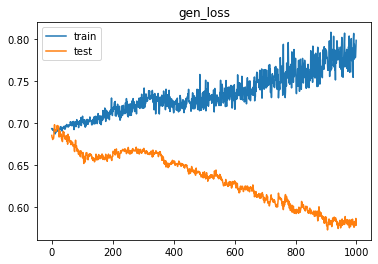

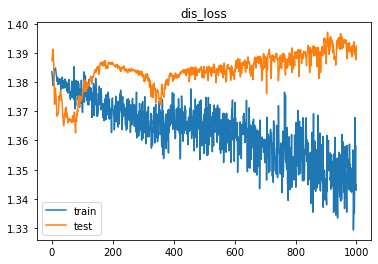

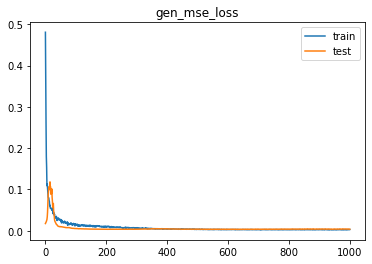

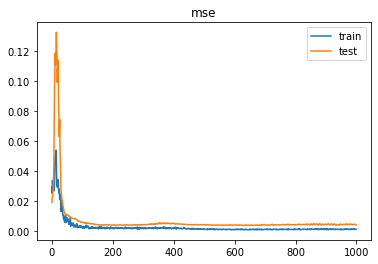

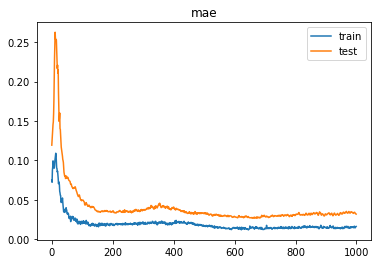

In [122]:
history, history_val = train(data_gen_train, data_gen_test, EPOCHS)
plot_history(history, history_val)


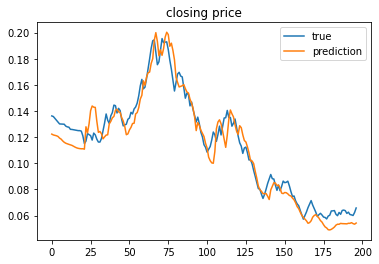

In [137]:
y_pred=[]
y_true=[]
for i in range(len(data_gen_test)):
  sequence, target = data_gen_test[i]
  y_pred .extend(generator.predict(sequence)[...,idx_col_GAN].tolist())
  y_true .extend(target[...,idx_col_GAN].tolist())

plt.figure()
plt.title("closing price")
plt.plot(y_true, label="true")
plt.plot(y_pred, label="prediction")
plt.legend()
plt.show()


In [138]:
from sklearn import metrics
import math

mse=metrics.mean_squared_error(y_true, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_true,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_true,y_pred) 
r2= metrics.r2_score(y_true, y_pred)
#----save to table --------
myTable.append(['GAN_Base',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)


[['FastRNN_Base', 0.0005, 0.0227, 0.0185, 0.6284, 0.1646], ['FastRNN_HOA', 0.0001, 0.0097, 0.0077, 0.9319, 0.0714], ['FastRNN_SHO', 0.0001, 0.0098, 0.008, 0.9303, 0.071], ['GAN_Base', 0.0001, 0.0096, 0.0079, 0.934, 0.0738]]


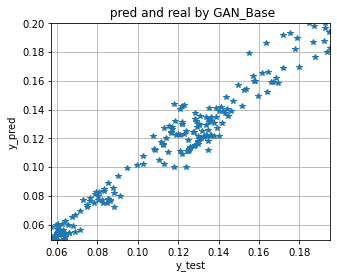

In [139]:
plt.figure(figsize=(5,4))
plt.plot(y_true,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_true),max(y_true)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by GAN_Base')
plt.show()

In [140]:
y_pred_GAN=y_pred

# **13. Final Result**

In [141]:
myTable=np.array(myTable)
print(myTable)

[['FastRNN_Base' '0.0005' '0.0227' '0.0185' '0.6284' '0.1646']
 ['FastRNN_HOA' '0.0001' '0.0097' '0.0077' '0.9319' '0.0714']
 ['FastRNN_SHO' '0.0001' '0.0098' '0.008' '0.9303' '0.071']
 ['GAN_Base' '0.0001' '0.0096' '0.0079' '0.934' '0.0738']]


In [142]:

data_res=pd.DataFrame(myTable,columns=["algorithm_name","MSE","RMSE","MAE","R2","MAPE"])
data_res=data_res[["algorithm_name","MSE","RMSE","MAE","MAPE","R2"]]
data_res[["MSE","RMSE","MAE","MAPE","R2"]]=data_res[["MSE","RMSE","MAE","MAPE","R2"]].astype(float)
data_res

,algorithm_name,MSE,RMSE,MAE,MAPE,R2
0,FastRNN_Base,0.0005,0.0227,0.0185,0.1646,0.6284
1,FastRNN_HOA,0.0001,0.0097,0.0077,0.0714,0.9319
2,FastRNN_SHO,0.0001,0.0098,0.0080,0.0710,0.9303
3,GAN_Base,0.0001,0.0096,0.0079,0.0738,0.9340


In [143]:
data_res.to_excel('out_2.xlsx')

In [ ]:
# tbl_as_csv = myTable.get_csv_string().replace('\r','')
# text_file = open("output_all.csv", "w")
# n = text_file.write(tbl_as_csv)
# text_file.close()
# data_res_metric=pd.read_csv("output_all.csv")
# data_res_metric

In [144]:
y_pred_GAN=y_test[0:len(y_test)-len(y_pred)].reshape(-1).tolist()

In [145]:
y_pred_GAN.extend(y_pred)
y_pred_SHO=FastRNN_SHO.predict(X_test,verbose=0)
y_pred_HOA=FastRNN_HOA.predict(X_test,verbose=0)
y_pred_RNN=model_FastRNN_Base.predict(X_test,verbose=0)

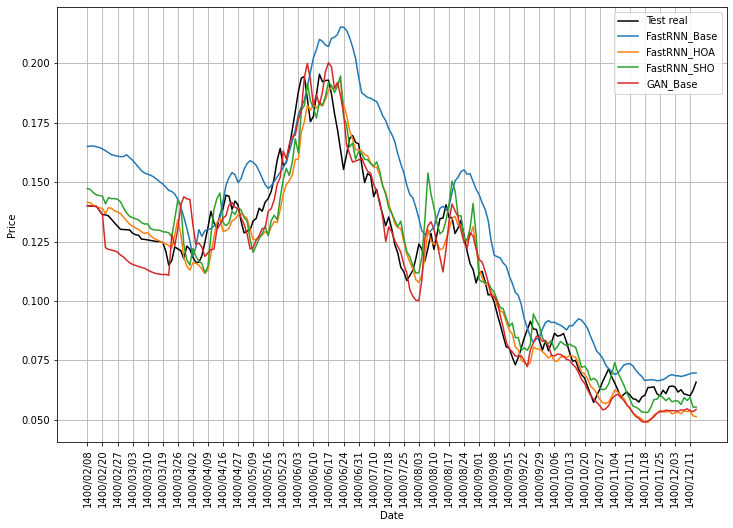

In [146]:
plt.figure(figsize=(12,8))
plt.plot(y_test,'k-',label='Test real')
plt.plot(y_pred_RNN,label='FastRNN_Base')
plt.plot(y_pred_HOA,label='FastRNN_HOA')
plt.plot(y_pred_SHO,label='FastRNN_SHO')
plt.plot(y_pred_GAN,label='GAN_Base')
idx=range(len(y_train),len(y_train)+len(y_test),5)
plt.xticks(range(0,len(y_test),5),data_main['تاریخ شمسی'].values[idx],rotation=90)
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(axis='both')
plt.legend()
plt.savefig('out1_final.png')
plt.show()


In [147]:
import pickle
filename = 'fastrnn_2.pkl'
pickle.dump(model_FastRNN_Base, open(filename, 'wb'))

filename = 'FastRNN_SHO_2.pkl'
pickle.dump(FastRNN_SHO, open(filename, 'wb'))

filename = 'FastRNN_HOA_2.pkl'
pickle.dump(FastRNN_HOA, open(filename, 'wb'))

filename = 'GAN_Base_2.pkl'
pickle.dump(generator, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://45c2a5d8-bcc4-4508-ba5f-ec05c28145be/assets
INFO:tensorflow:Assets written to: ram://1c99d1f3-dd4b-4ed0-b659-d386272831fb/assets
INFO:tensorflow:Assets written to: ram://a88979d0-1e19-425c-a77b-a3120113c3e3/assets
INFO:tensorflow:Assets written to: ram://191250e3-d52d-4c80-8bef-f60aac223b2f/assets
